In [9]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import sys
from scipy.stats import binned_statistic
import warnings
from scipy.optimize import minimize
import tune_SMP_tools as tst
warnings.filterwarnings("ignore")
from importlib import reload
import os

In [37]:
sys.path.insert(1,'../../snowmicropyn')
import snowmicropyn
print(snowmicropyn.__file__)

from snowmicropyn import density_ssa

../../snowmicropyn/snowmicropyn/__init__.py


In [39]:
frames = pickle.load(open('../data/microCT/processed_mCT.p', 'rb'))
frames.keys()

available_smps = os.listdir('../scripts/data')
pit_info = pd.read_csv('../data/SNEX20_SMP_FieldNotes.csv',skiprows=9)
pit_smps = pit_info[pit_info['Orientation'] == 'P']

site_smp_dict = {}

for site in frames.keys():
    
    site_smp_dict[site] = []

    relevant_smps = pit_smps[pit_smps['Pit ID'] == site]
    
    codes = list(relevant_smps['Fname sufix'])
    
    for code in codes:
        for smp_fname in available_smps:
            if str(code) in smp_fname:
                site_smp_dict[site].append(smp_fname)
site_smp_dict    

{'2S16': ['SNEX20_SMP_S19M1260_2S16_20200208.PNT',
  'SNEX20_SMP_S19M1261_2S16_20200208.PNT',
  'SNEX20_SMP_S19M1262_2S16_20200208.PNT'],
 '2N13': ['SNEX20_SMP_S19M1172_2N13_20200206.PNT',
  'SNEX20_SMP_S19M1173_2N13_20200206.PNT',
  'SNEX20_SMP_S19M1174_2N13_20200206.PNT'],
 '2S7': ['SNEX20_SMP_S19M1255_2S7_20200208.PNT',
  'SNEX20_SMP_S19M1256_2S7_20200208.PNT',
  'SNEX20_SMP_S19M1257_2S7_20200208.PNT'],
 '1S17': ['SNEX20_SMP_S19M1285_1S17_20200208.PNT',
  'SNEX20_SMP_S19M1287_1S17_20200208.PNT',
  'SNEX20_SMP_S19M1289_1S17_20200208.PNT'],
 '9C16': ['SNEX20_SMP_S19M1150_9C16_20200205.PNT',
  'SNEX20_SMP_S19M1151_9C16_20200205.PNT',
  'SNEX20_SMP_S19M1152_9C16_20200205.PNT']}

2S16


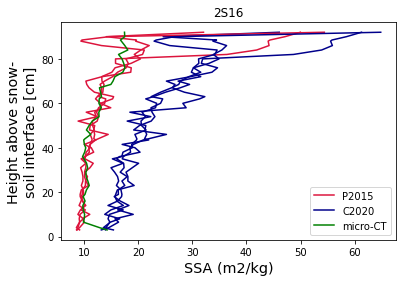

Latitude value -99999.0 invalid, replacing by None
Longitude value -99999.0 invalid, replacing by None


2N13


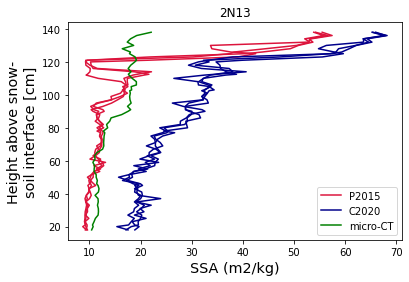

2S7


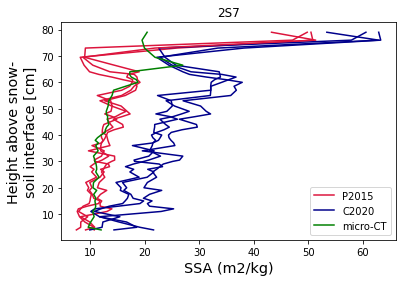

1S17


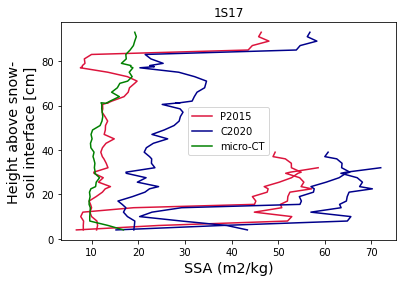

9C16


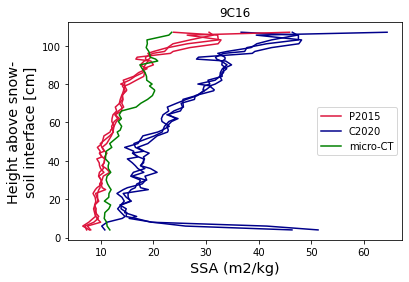

In [48]:
C20_coeffs = [0.57, -18.56, -3.66]
  
P15_coeffs = [0.131, 0.355, 0.0291]

C20_window = 1

reload(tst)

for site in frames.keys():
    
    print(site)
        
    mct_df = tst.get_mct_frame(site)
    
    for counter, smp_file in enumerate(site_smp_dict[site]):
        
        p = snowmicropyn.Profile.load(f'../scripts/data/{smp_file}')
        
        p.detect_ground()

        C20_df = tst.compare_smp_to_mct(C20_coeffs,mct_df,p)

        P15_df = tst.compare_smp_to_mct(P15_coeffs,mct_df,p,eqn='l_ex')
        
        #################
        
        if counter == 0:Plabel = 'P2015';Clabel = 'C2020'
        else: Plabel = None;Clabel = None

        plt.plot(P15_df['ssa'],P15_df.index,label=Plabel,color='crimson')

        plt.plot(C20_df['ssa'],P15_df.index,label=Clabel,color='darkblue')
        
    plt.title(site)

    plt.xlabel('SSA (m2/kg)', fontsize='x-large')
    plt.ylabel('Height above snow-\nsoil interface [cm]', fontsize='x-large')

    plt.plot(P15_df['SSA (m2/kg)'],P15_df.index,label='micro-CT',color='green')

    plt.legend()

    plt.show()

In [ ]:
reload(tst)

minimization_dict = {}

for site in frames.keys():
    
    minimisation_dict[site] = {}
    
    print(site)
        
    mct_df = tst.get_mct_frame(site)
    
    for counter, smp_file in enumerate(site_smp_dict[site]):
        
        print(smp_file)
        
        p = snowmicropyn.Profile.load(f'../scripts/data/{smp_file}')
        
        p.detect_ground()

        min_output = minimize(fun=tst.calc_RMSE,
                             x0=C20_coeffs,
                             args=(mct_df, p, False))
        
        minimized_coeffs = list(min_output.x)
        
        print(minimized_coeffs)
        
        minimization_dict[site][smp_file] = minimized_coeffs

2S16
SNEX20_SMP_S19M1260_2S16_20200208.PNT
